In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\x1 carbon\Downloads\advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [9]:

df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
import seaborn as sns

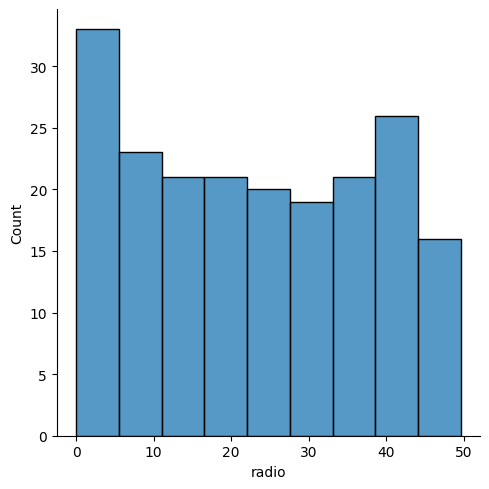

In [12]:
sns.displot(df['radio'])

In [13]:
np.log(df['newspaper'])

0      4.237001
1      3.808882
2      4.238445
3      4.069027
4      4.067316
         ...   
195    2.624669
196    2.091864
197    1.856298
198    4.192680
199    2.163323
Name: newspaper, Length: 200, dtype: float64

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(x_test)

In [16]:
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [17]:

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
f"The model performing mse : {mse},mae:{mae},and rmse:{rmse} and r2:{r2}"

'The model performing mse : 4.402118291449681,mae:1.3617813502090272,and rmse:2.0981225634956795 and r2:0.8601145185017869'

In [18]:
if r2 > 0.85:
    print("model performance is good")
elif r2 > 0.75:
    print("model performance is average")
else :
    print("model is good")

model performance is good


In [28]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
def model_acc(y_test, y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    print(f"The model is performing mse : {mse},mae:{mae},and rmse:{rmse}and r2:{r2}")

models = [LinearRegression(), Lasso(), Ridge()]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_acc(y_test, y_pred)

The model is performing mse : 4.402118291449681,mae:1.3617813502090272,and rmse:2.0981225634956795and r2:0.8601145185017869
The model is performing mse : 4.336766740202981,mae:1.363863034897014,and rmse:2.0824905138326515and r2:0.8621911853715882
The model is performing mse : 4.40202706278683,mae:1.3617710633068216,and rmse:2.0981008228364124and r2:0.8601174174619203
